<a href="https://colab.research.google.com/github/derewor/EMS-mutagenesis-SQL-and-Python/blob/main/EMS_mutagenesis_SQL_and_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=f5f304fb20127ee5c080fc4990672ab08f0c4e46a2bde50c36220dd8a8cf30b2
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [85]:
import numpy as np
import pandas as pd
import pandasql as ps
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import sqlalchemy as sa

In [119]:
#emsline7d = pd.read_csv('/content/emsline7d.csv')
emsline17j = pd.read_csv('/content/emsline17j.csv')
#emsline13j = pd.read_csv('/content/emsline13j.csv')
emsline21h = pd.read_csv('/content/emsline21h.csv')
chrom2_coordinate = pd.read_excel('/content/chrom2 coordinates.xlsx')

In [120]:
chrom2_coordinate.head()

,gene_code,chrom_no,strand,gene_part,gene_pos_start,gene_pos_stop,type,floor_gene_start,ceiling_gene_stop
0,AT2G25790.1,chr2,W,Exon,11000631,11004031,gene,11000630,11004040
1,AT2G25800.1,chr2,C,Exon,11006138,11009728,gene,11006130,11009730
2,AT2TE47440,chr2,C,Exon,11010073,11010228,gene,11010070,11010230
3,AT2TE47445,chr2,W,Exon,11011138,11011335,gene,11011130,11011340
4,AT2G25810.1,chr2,W,Exon,11012658,11013906,gene,11012650,11013910


In [6]:
sql_query = 'SELECT * FROM emsline17j LIMIT 5'

In [7]:
result = ps.sqldf(sql_query)
result = pd.DataFrame(result)
#print(result)

In [25]:
line17j_selected = "SELECT * FROM emsline17j WHERE chromosome IN ('Chr2', 'Chr5')"
line17j_chr2_5 = ps.sqldf(line17j_selected, locals())
print(line17j_chr2_5)

     chromosome  position                                      reference_seq  \
0          Chr2      1000                                                  N   
1          Chr2      1033                                                  C   
2          Chr2      1966                                                  A   
3          Chr2      2019                                                  T   
4          Chr2      2111                                                  A   
...         ...       ...                                                ...   
4726       Chr5  26829330  CTCTTCTTCTTCTTCTTCTTCTTCTTCTTCTTCTTCTTCTTCTTCTTCT   
4727       Chr5  26839407                                                  G   
4728       Chr5  26860234                                                  G   
4729       Chr5  26890788                               AATATATATATATATATATA   
4730       Chr5  26905602                             CATATATATATATATATATATA   

                                     al

In [9]:
line21h_selected = "SELECT * FROM emsline21h WHERE chromosome IN ('Chr2', 'Chr5')"
line21h_chr2_5 = ps.sqldf(line21h_selected, locals())

In [26]:
# The positions values contain some date formats which needs to be cleaned before the analysis.
# This can be done using SQL codes
clean_line17j = "SELECT *, REPLACE(REPLACE(position,'-',''),'/','') AS clean_position FROM line17j_chr2_5"
clean_17j = ps.sqldf(clean_line17j, locals())

In [28]:
clean_line21h = "SELECT *, REPLACE(REPLACE(position,'-',''),'/','') AS clean_position FROM line21h_chr2_5"
clean_21h = ps.sqldf(clean_line21h, locals())

In [32]:
# The pcr based qtl analysis suggested that mutations that rescued the ssadh phenotype are located in the
# lower arms of chromosme 2 and 5. So, I subsetted the data contained in chromosome 2 and 5
# subsetting of chromosome 2 an 5 data from both lines
line17j_chr2 = clean_17j[clean_17j['chromosome']=='Chr2']
line17j_chr5 = clean_17j[clean_17j['chromosome']=='Chr5']
line21h_chr2 = clean_21h[clean_21h['chromosome']=='Chr2']
line21h_chr5 = clean_21h[clean_21h['chromosome']=='Chr5']

In [58]:
# the clean position has a data type format object. This need to be converted to integers
line17j_chr2['clean_position'] =line17j_chr2['clean_position'].astype(int)
line17j_chr5['clean_position'] =line17j_chr5['clean_position'].astype(int)
line21h_chr2['clean_position'] =line21h_chr2['clean_position'].astype(int)
line21h_chr5['clean_position'] =line21h_chr5['clean_position'].astype(int)

<ipython-input-58-526e62506a30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  line17j_chr2['clean_position'] =line17j_chr2['clean_position'].astype(int)
<ipython-input-58-526e62506a30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  line17j_chr5['clean_position'] =line17j_chr5['clean_position'].astype(int)
<ipython-input-58-526e62506a30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [59]:
# the mutations position between 11000000 and 13000000 in chr2 and between 17000000 and 19000000 in chro5.
line17j_chr2_target = line17j_chr2[(line17j_chr2['clean_position']> 11000000) & (line17j_chr2['clean_position']<13000000)]
line17j_chr5_target = line17j_chr5[(line17j_chr5['clean_position']> 17000000) & (line17j_chr5['clean_position']<19000000)]
line21h_chr2_target = line21h_chr2[(line21h_chr2['clean_position']> 11000000) & (line21h_chr2['clean_position']<13000000)]
line21h_chr5_target = line21h_chr5[(line21h_chr5['clean_position']> 17000000) & (line21h_chr5['clean_position']<19000000)]

In [60]:
line17j_chr2_target.head()

,chromosome,position,reference_seq,alternative_seq,deep_seq_num,indel_pres,clean_position
1544,Chr2,11002492,C,T,71,.,11002492
1545,Chr2,11017525,A,C,62,.,11017525
1546,Chr2,11038939,TA,T,50,TRUE,11038939
1547,Chr2,11038940,A,"T,G",7,.,11038940
1548,Chr2,11041565,G,A,37,.,11041565


In [66]:
# The depth of sequencing is an important factor to determine the reliability of the sequencing result. For the whole
# genome sequencing (WGS), at least 30X the sequence needs to be observed. So, a 30X cutoff point is used to screen
# reliable mutations
line17j_chr2_target_seq = line17j_chr2_target[line17j_chr2_target['deep_seq_num'] >= 30]
line17j_chr5_target_seq = line17j_chr5_target[line17j_chr5_target['deep_seq_num'] >= 30]
line21h_chr2_target_seq = line21h_chr2_target[line21h_chr2_target['deep_seq_num'] >= 30]
line21h_chr5_target_seq = line21h_chr5_target[line21h_chr5_target['deep_seq_num'] >= 30]

In [69]:
df1_17j_chr2 = pd.DataFrame(line17j_chr2_target_seq)
df2_17j_chr5 = pd.DataFrame(line17j_chr5_target_seq)
df3_21h_chr2 = pd.DataFrame(line21h_chr2_target_seq)
df4_21h_chr5 = pd.DataFrame(line21h_chr5_target_seq)

In [110]:
# How many mutations have been found within the target region? how many are SNP and how many are INDELs
df1_17j_chr2_filtered = df1_17j_chr2[df1_17j_chr2['reference_seq']!='N']
def replace_value(val):
  if val == '.':
    return 'SNP'
  else:
    return 'INDEL'
df1_17j_chr2_filtered['indel_pres'] = df1_17j_chr2_filtered['indel_pres'].apply(replace_value)
# The total number of mutations in the region
total_num_mutations = df1_17j_chr2_filtered.shape[0]
print(total_num_mutations)
# The total number of SNP and INDEL
SNP_AND_INDEL = df1_17j_chr2_filtered.groupby('indel_pres')['reference_seq'].count().reset_index()
SNP_AND_INDEL.columns =['mutation_type', 'count_mutations']

73


<ipython-input-110-8361dab4fa1c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_17j_chr2_filtered['indel_pres'] = df1_17j_chr2_filtered['indel_pres'].apply(replace_value)


In [89]:
df1_17j_chr2_filtered.head()

,chromosome,position,reference_seq,alternative_seq,deep_seq_num,indel_pres,clean_position
1544,Chr2,11002492,C,T,71,SNP,11002492
1545,Chr2,11017525,A,C,62,SNP,11017525
1546,Chr2,11038939,TA,T,50,INDEL,11038939
1548,Chr2,11041565,G,A,37,SNP,11041565
1549,Chr2,11066190,ATTTTTTTTTTTT,ATTTTTTTTTTTTT,47,INDEL,11066190


In [121]:
df1_17j_chr2_SNP = df1_17j_chr2_filtered[df1_17j_chr2_filtered['indel_pres']=='SNP']
df1_17j_chr2_SNP.head(2)

,chromosome,position,reference_seq,alternative_seq,deep_seq_num,indel_pres,clean_position
1544,Chr2,11002492,C,T,71,SNP,11002492
1545,Chr2,11017525,A,C,62,SNP,11017525


In [132]:
SNP_merged_query = "SELECT sn.position, sn.reference_seq, sn.alternative_seq, cc.gene_code, cc.strand, cc.gene_pos_start, \
                    cc.gene_pos_stop \
                    FROM df1_17j_chr2_SNP sn LEFT JOIN chrom2_coordinate cc ON sn.position > cc.gene_pos_start \
                    AND sn.position < cc.gene_pos_stop"
SNP_merged = ps.sqldf(SNP_merged_query, locals())
SNP_merged.head()

,position,reference_seq,alternative_seq,gene_code,strand,gene_pos_start,gene_pos_stop
0,11002492,C,T,AT2G25790.1,W,11000631.0,11004031.0
1,11017525,A,C,None,None,NaN,NaN
2,11041565,G,A,AT2TE47595,C,11041547.0,11041585.0
3,11162058,C,A,AT2G26220.2,W,11159481.0,11162392.0
4,11162058,C,A,AT2G26220.1,W,11159507.0,11162390.0


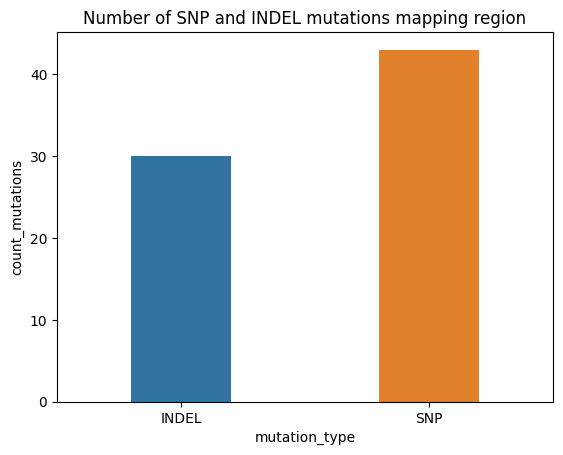

In [116]:
sns.barplot(x='mutation_type', y='count_mutations', hue='mutation_type',width=0.4, data=SNP_AND_INDEL)
plt.title('Number of SNP and INDEL mutations mapping region')
plt.show()